# Assignment 1

Install neccessary libraries

In [ ]:
!pip install scikit-learn
!pip install numpy

Import packages

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import math


# Dataset
Load the data from sklearn.datasets. For this assignment we are using the Breast Cancer Classification dataset.

In [ ]:
breast_cancer = load_breast_cancer()
class_names = breast_cancer.target_names
X_data, y_data = load_breast_cancer(return_X_y=True)

# Partition the dataset into 80/20 split, random seed is 50
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, train_size=0.8, random_state=50)

# Create a dataset with scaled features for the KNN model
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Training
Create 3 default models and train them on the input data.

In [ ]:
# Default is 5 neighbors
knn = KNeighborsClassifier()
knn = knn.fit(X_train_scaled, y_train)

# Default settings
decision_tree = DecisionTreeClassifier()
decision_tree = decision_tree.fit(X_train, y_train)

# Default has 100 estimators
rand_forest = RandomForestClassifier()
rand_forest = rand_forest.fit(X_train, y_train)

classifiers = [knn, decision_tree, rand_forest]

# Predict on the test
def get_predictions(classifiers):
  return [classifier.predict(X_test_scaled if str(classifier) == "KNeighborsClassifier()" else X_test) for classifier in classifiers]

predictions = get_predictions(classifiers)

Let's take a look at their accuracy on the test set.

In [ ]:
def get_metrics(predictions, model_names):
    return pd.DataFrame({
        "Model": model_names,
        "Accuracy": [metrics.accuracy_score(y_test, pred) for pred in predictions],
        "Precision": [metrics.precision_score(y_test, pred, average="weighted") for pred in predictions],
        "Recall": [metrics.recall_score(y_test, pred, average="weighted") for pred in predictions],
        "F1-Score": [metrics.f1_score(y_test, pred, average="weighted") for pred in predictions],
    })

# Helper function for creating nice latex table
def write_to_table(name, data):
  with open(
      os.path.splitext(
          os.path.basename(name))[0] + ".tbl", "w") as f:

      format = "l" + \
          "@{\hskip 12pt}" +\
          4*"S[table-format = 2.2]"

      f.write(data.head()
              .to_latex(index=False,
                        escape=False,
                        column_format=format)
              )

print(predictions)
# print(get_metrics(predictions, str(classifiers)))

[array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1]), array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1]), array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1

# Evaluation
Plot the Confusion Matrices

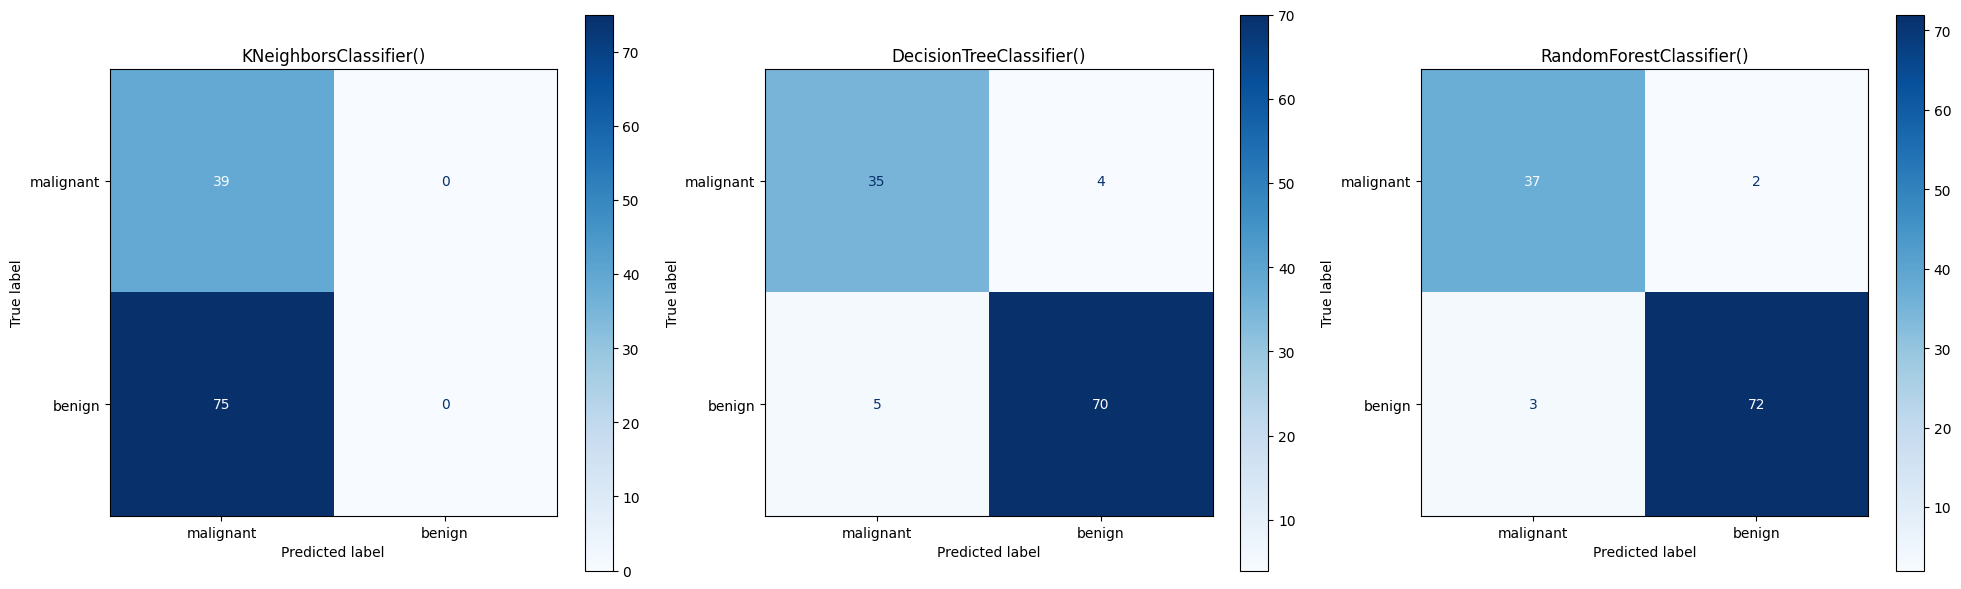

In [ ]:
def plot_cm(classifiers):
    # Calculate the number of classifiers
    num_classifiers = len(classifiers)

    nrows = math.ceil(num_classifiers / 3)
    ncols = 3  # We want 3 classifiers per row

    fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 6 * nrows))
    axs = axs.flatten()

    for i, classifier in enumerate(classifiers):
        y_pred = classifier.predict(X_test_scaled if classifier == knn else X_test)
        cm = confusion_matrix(y_test, y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
        disp.plot(ax=axs[i], cmap=plt.cm.Blues)
        axs[i].set_title(str(classifier))

    # Remove unused subplots (if any) in case classifiers < 3 * nrows
    for j in range(i + 1, len(axs)):
        axs[j].axis('off')

    plt.tight_layout()
    plt.show()

plot_cm(classifiers)


# Ablation Study

Let's modify some key parameters of each model and compare the results

               Accuracy  Precision    Recall  F1-Score
KNN            0.929825   0.958904  0.933333  0.945946
Decision Tree  0.921053   0.934211  0.946667  0.940397
Random Forest  0.956140   0.972973  0.960000  0.966443



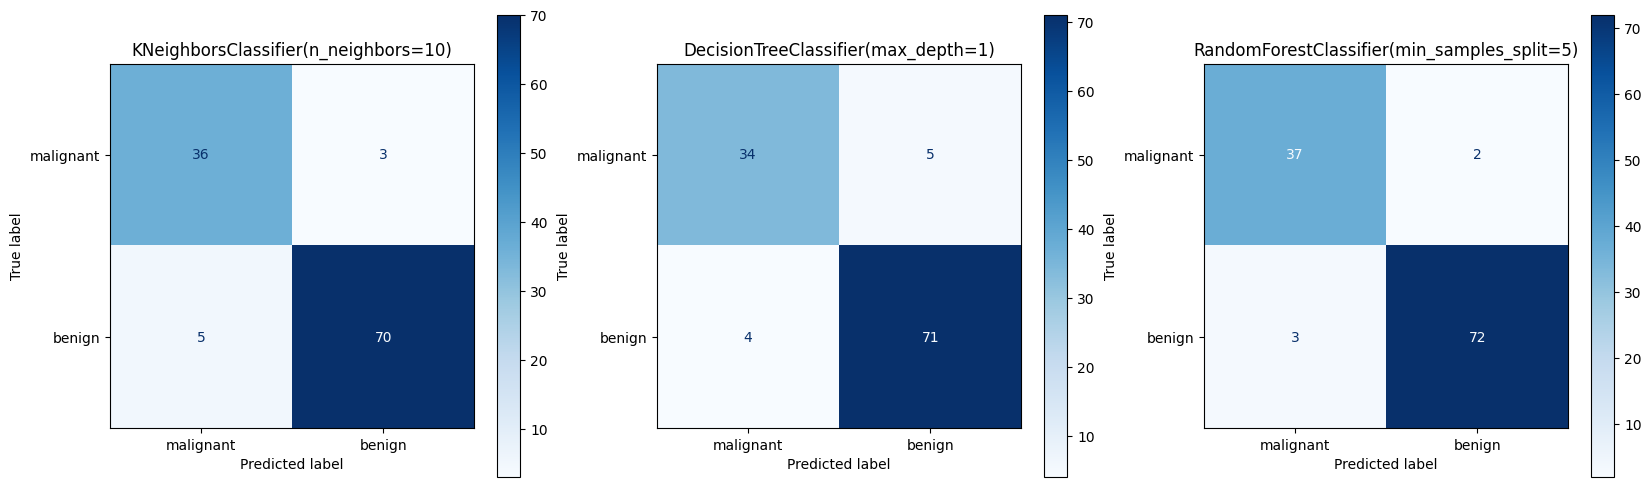

In [ ]:
# Define some parameters

knn = KNeighborsClassifier(n_neighbors=10)
dt = DecisionTreeClassifier(max_depth=1)
rf = RandomForestClassifier(max_depth=None, min_samples_split=5, n_estimators=100)

more_classifiers = [knn, dt, rf]
for m in more_classifiers:
  m.fit(X_train_scaled if str(m) == "KNeighborsClassifier()" else X_train, y_train)

print(get_metrics(get_predictions(more_classifiers)))
print()

plot_cm(more_classifiers)


[1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 0 1 1 0 1 1 0 0 1 1 1
 1 1 1 1 0 0 1 1 1 1 0 1 0 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 1 1 1 1 0 0 1 0 1
 0 0 1 1 0 1 0 1 1 1 1 0 0 1 1 0 0 0 0 1 1 0 1 1 0 1 1 1 1 0 1 0 0 1 0 0 0
 0 0 1]
                                Model  Accuracy  Precision   Recall  F1-Score
                            KNN (k=5)  0.964912   0.965956 0.964912  0.965114
                           KNN (k=10)  0.956140   0.958281 0.956140  0.956505
                           KNN (k=20)  0.973684   0.974004 0.973684  0.973762
           Decision Tree (depth=None)  0.929825   0.931243 0.929825  0.930228
              Decision Tree (depth=3)  0.956140   0.956025 0.956140  0.956001
              Decision Tree (depth=5)  0.947368   0.947368 0.947368  0.947368
             Decision Tree (depth=10)  0.947368   0.948599 0.947368  0.947671
Random Forest (trees=100, depth=None)  0.956140   0.956561 0.956140  0.956271
   Random Forest (trees=100, depth=5)  0.947368   0.947368 0.9473

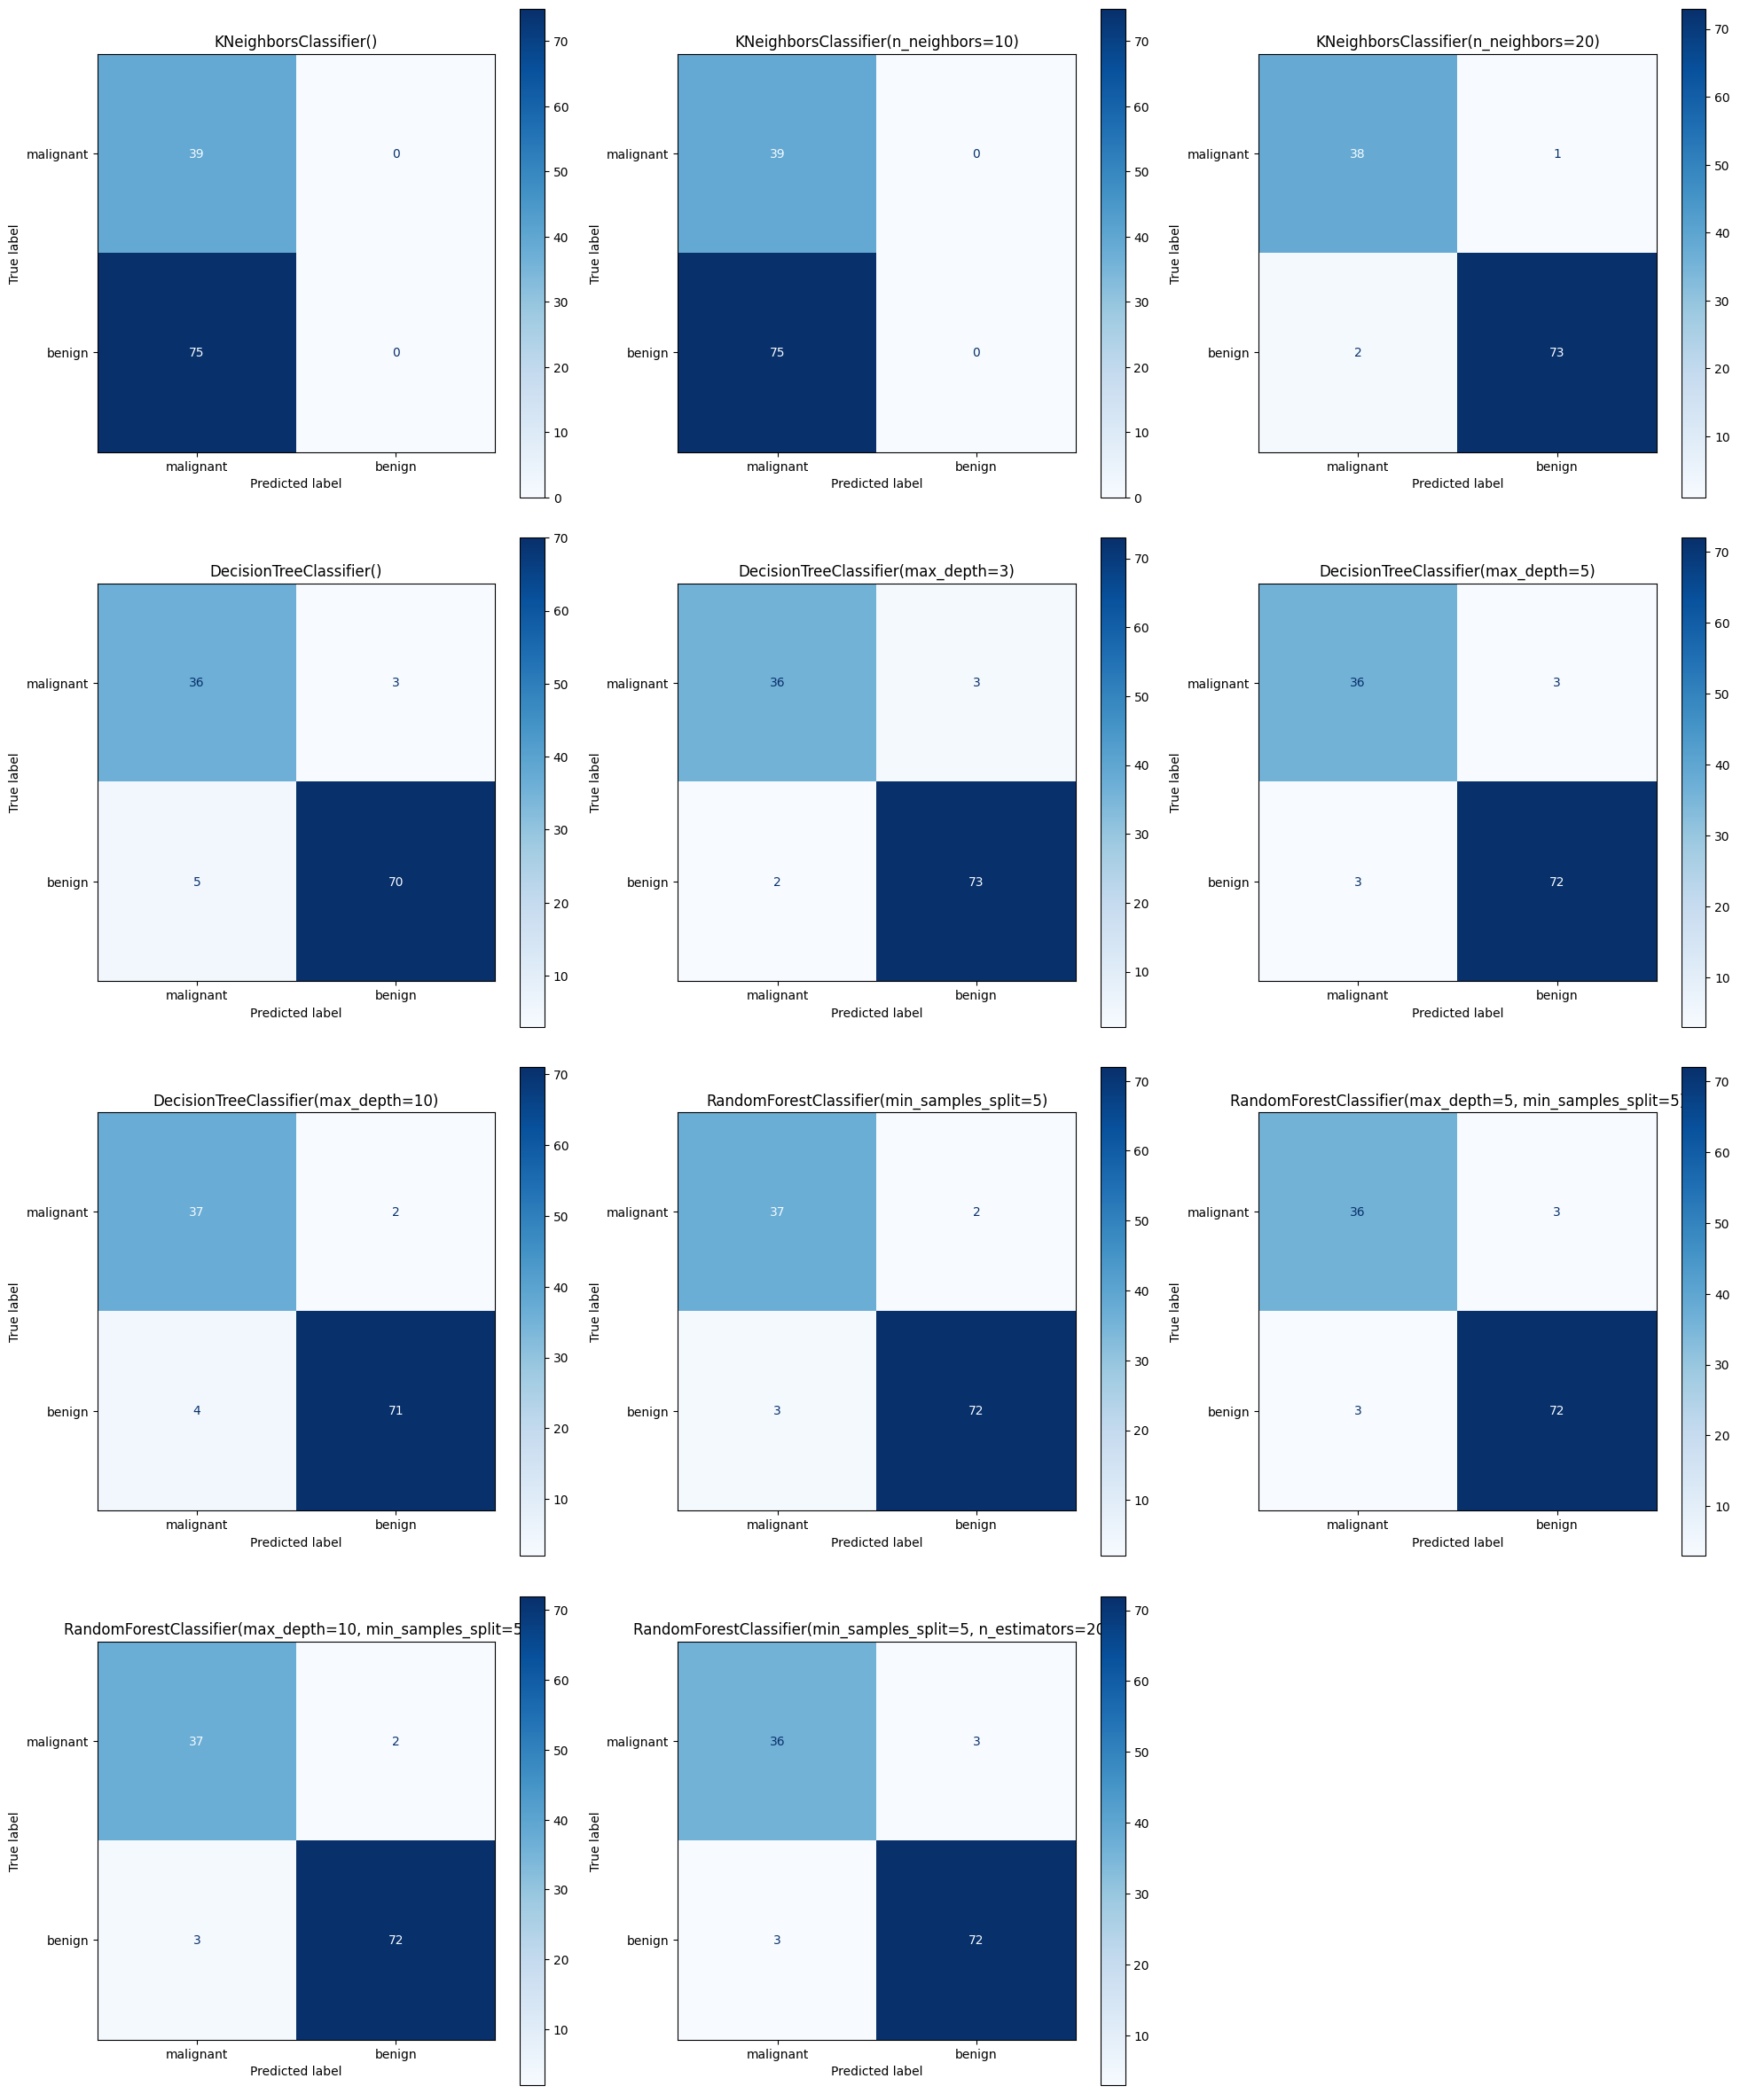

In [ ]:
param_grid = {
    "KNN": [5, 10, 20],
    "Decision Tree": [None, 3, 5, 10],
    "Random Forest": [(100, None), (100, 5), (100, 10), (200, None)]
}

models = []
model_names = []
predictions = []

for k in param_grid["KNN"]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    models.append(knn)
    model_names.append(f"KNN (k={k})")
    predictions.append(knn.predict(X_test_scaled))

for depth in param_grid["Decision Tree"]:
    dt = DecisionTreeClassifier(max_depth=depth)
    dt.fit(X_train, y_train)
    models.append(dt)
    model_names.append(f"Decision Tree (depth={depth})")
    predictions.append(dt.predict(X_test))

for n_estimators, max_depth in param_grid["Random Forest"]:
    rf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, min_samples_split=5)
    rf.fit(X_train, y_train)
    models.append(rf)
    model_names.append(f"Random Forest (trees={n_estimators}, depth={max_depth})")
    predictions.append(rf.predict(X_test))

print(predictions[0])
# Generate consolidated metrics table
df = get_metrics(predictions, model_names)

# Print final table correctly
print(df.to_string(index=False))

format = "l" + \
          "@{\hskip 12pt}" +\
          4*"S[table-format = 2.2]"
print(df.to_latex(column_format=format))

# Plot confusion matrices
plot_cm(models)